Temp Link:  https://github.com/rab175/bank-marketing-classification/blob/master/Mod5_Project_Bank_Marketing_Classifier.ipynb

## 1. Project Overview


### Background
This project was designed to explore various machine learning models and methods with the task of binary classification.  The dataset used is bank marketing dataset taken from <b>UCI Machine Learning repository</b> (see details below).

<b>Project goal:</b>  The goal of this project is to develop a model that predicts the success of the bank's direct marketing campaign (phone call) using the features provided in the dataset.  From a business perpespective, the predictions can be used to better target potential customers who are likely to subscribe (yes/no) into receiving the new product offering, which is a term deposit.

### Citation
This dataset is publicly available for research. The details are described in [Moro et al., 2014]. Please include this citation if you plan to use this database:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, <a href="https://www.sciencedirect.com/science/article/abs/pii/S016792361400061X?via%3Dihub"> http://dx.doi.org/10.1016/j.dss.2014.03.001</a>

Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001 [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

Link to data: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### Attribute Information:

Input variables:
#### bank client data:
1 - age (numeric)\
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')\
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)\
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')\
5 - default: has credit in default? (categorical: 'no','yes','unknown')\
6 - housing: has housing loan? (categorical: 'no','yes','unknown')\
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
#### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')\
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')\
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')\
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)\
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)\
14 - previous: number of contacts performed before this campaign and for this client (numeric)\
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
#### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)\
17 - cons.price.idx: consumer price index - monthly indicator (numeric)\
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)\
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)\
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## 2. Import Libaries and Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.feature_selection import RFE

import xgboost as xgb
from xgboost import XGBClassifier
from itertools import combinations

import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing dataset
#dataset = pd.read_csv("data/bank-additional-full.csv", sep = ";")
# df = pd.read_csv("data/bank-additional.csv", sep = ";")
df = pd.read_csv("data/bank-additional-full.csv", sep = ";")
pd.set_option('display.max_columns', None)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.shape

(41188, 21)

In [4]:
# check the data types and number of entries for each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Initial data observations
* In the full dataset, there are about 41188 variables including the target variable `y`
* Although there are no missing values, we already know there are placeholder values which act as missing values

In [42]:
# show summary statistics for each continuous numerical variable
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,p_contacted
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.036783
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.188230
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


#### Notes:
* `duration` has a lot of variance
* the mean and median of `campaign` are very close, but the max value is much higher
* the placeholder `999` has significant influence over `pdays`
* most other variables appear somewhat stable and normally distributed. With exploratory data analysis, we can further validate this

## 3. Data Cleansing and Preparation

In this section we will perform the following tasks:
1. Check missing values and how to deal with them
2. Inspect and learn more about the values in each feature
3. Inspect `999` placeholder values and determine how to handle them:
    * Imputation
    * Drop entries or entire feature
    * Leave them as is

In [6]:
# 3-1:  Check for any na values in the dataset
df.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

There are no missing values, so we can proceed to next step.

In [7]:
# 3-2: Inspect values in each feature

# Separate features into categorical and numerical groups
numerical_features = []
categorical_features = []

for col in df.columns: 
    if df[col].dtype == 'O':
        categorical_features.append(col)
    else: 
        numerical_features.append(col)

print(f'There are {len(categorical_features)} categorical features: \n', categorical_features)
print('********' * 8)
print(f'There are {len(numerical_features)} numerical variables: \n', numerical_features)

There are 11 categorical features: 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
****************************************************************
There are 10 numerical variables: 
 ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [8]:
# check the number of unique values and its percent distribution
# for each categorical variable
for v in categorical_features:
    print(f'\nUnique values for {v}: {df[v].nunique()}\n',
          str(round(df[v].value_counts(normalize=True)*100, 2)))


Unique values for job: 12
 admin.           25.30
blue-collar      22.47
technician       16.37
services          9.64
management        7.10
retired           4.18
entrepreneur      3.54
self-employed     3.45
housemaid         2.57
unemployed        2.46
student           2.12
unknown           0.80
Name: job, dtype: float64

Unique values for marital: 4
 married     60.52
single      28.09
divorced    11.20
unknown      0.19
Name: marital, dtype: float64

Unique values for education: 8
 university.degree      29.54
high.school            23.10
basic.9y               14.68
professional.course    12.73
basic.4y               10.14
basic.6y                5.56
unknown                 4.20
illiterate              0.04
Name: education, dtype: float64

Unique values for default: 3
 no         79.12
unknown    20.87
yes         0.01
Name: default, dtype: float64

Unique values for housing: 3
 yes        52.38
no         45.21
unknown     2.40
Name: housing, dtype: float64

Unique values f

#### Categorical value notes:
* `job`: There are 12 unique values for job and is well distributed
    - Less than 1% of values are `unknown`
    - Given the relatively small number of unknowns and much larger number of unique values, these missing values should not have a major influence on our model, so we can leave it alone for now
* `marital`: There are 4 unique values including the `unknown` having a distribution that seems representative
    - Less than 0.2% of values are `unknown`. Given the small distribution, we can safely impute values by applying the known distribution to the unknown values
    - When performing one-hot encoding, this will eliminate one unneccessary variable
* `education`: There are 8 unique values with 4.2% unknown
    - Consider imputing values since given its relatively small percentage
    - We can also apply the known distribution to the unknown values
* `default`: A binary yes/no variable, but also includes just over 20% `unknown`
	- This would be a large value to impute or drop
	- Given the small distribution for `yes` we could safely code all `unknowns` as `no`
	- But, this is also interesting business case, if lack of knowledge of a default actually positively or negatively impacts to a successful marketing call, so we will also leave `unknown` in place for now
* `housing`: A binary yes/no variable, but with a much smaller amount of unknowns, 2.4% 
    - For this variable we can likely safely impute again by applying the known distribution
* `loan`: Another binary yes/no variable with the same % of unknowns
    - We can also impute values
    - With the same amount of unknowns as `housing`, it would be interesting to see if they are the same entries, and if they are missing more data should perhaps be dropped altogether
* `contact`: This variable is interestingly binary as well, between `cellular` and `telephone`, we'll have to pay attention to how it is coded when we transform to dummies
* `month`: It appears this campaign was only for 10 months and heavily focused on the spring and early summer
* `day_of_week`: Calls were only made during the work week and seem very evenly distributed
	- Given the even distribution it will be very interesting to see if one day of the week was more fruitful that others
* `poutcome`: It appears that most people that had been contacted were not part of a previous campaign
	- For those that were previously contacted it will be very interesting to see if it has an influence on future success - especially those that were successfully reached previously
* `y`: The target variable. No missing values here! Also it is good that we have a fairly significant positive rate with 11.27%.

#### Numerical observations: 
We've already previously seen the descriptive statistics of our continuous variables above and with continue to explore them in our EDA.

We do however know that we need to deal with the `999` placeholder for `pdays`

In [9]:
# impute values using function based on the weights of the currently known values
# write a function that takes a variable and returns a randomly selected 
# value if the variable is 'unknown'
def impute_values(variable, values, prob):
    if variable == 'unknown':
        return np.random.choice(values, p=prob)
    else: 
        return variable

#### Handling Marital unknown

In [10]:
# get a unique list values and drop 'unknown'
values = list(set(df.marital.values))
values.remove('unknown')
values

['single', 'divorced', 'married']

In [11]:
# determine the weight of each value in the category 
prob = df[df['marital'] != 'unknown'].marital.value_counts(normalize=True)
prob = [i/sum(prob) for i in prob]
prob

[0.6064026466867763, 0.2814050793032986, 0.11219227400992507]

In [12]:
# check the current distribution of values
df.marital.value_counts(normalize=True)

married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64

In [13]:
# impute the values for 'unknown'
df.marital = df.marital.map(lambda x: impute_values(x, values, prob))

In [14]:
# recheck the new distribution of values
df.marital.value_counts(normalize=True)

married     0.605589
single      0.282000
divorced    0.112411
Name: marital, dtype: float64

#### Handling Education unknown

In [15]:
# get a unique list values and drop 'unknown'
values = list(set(df.education.values))
values.remove('unknown')
values

['basic.4y',
 'professional.course',
 'high.school',
 'illiterate',
 'university.degree',
 'basic.9y',
 'basic.6y']

In [16]:
# determine the weight of each value in the category 
prob = df[df['education'] != 'unknown'].education.value_counts(normalize=True)
prob = [i/sum(prob) for i in prob]
prob

[0.3083863446283296,
 0.2411485921382771,
 0.15320475454292015,
 0.13287883011886356,
 0.10583673365942672,
 0.05808855209468535,
 0.00045619281749752894]

In [17]:
# check the current distribution of values
df.education.value_counts(normalize=True)

university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: education, dtype: float64

In [18]:
# impute the values for 'unknown'
df.education = df.education.map(lambda x: impute_values(x, values, prob))

In [19]:
# recheck the new distribution of values
df.education.value_counts(normalize=True)

university.degree      0.299602
high.school            0.237788
basic.9y               0.148927
professional.course    0.136885
basic.4y               0.114936
basic.6y               0.055672
illiterate             0.006191
Name: education, dtype: float64

#### Handling Housing unknown

In [20]:
# get a unique list values and drop 'unknown'
values = list(set(df.housing.values))
values.remove('unknown')
values

['no', 'yes']

In [21]:
# determine the weight of each value in the category 
prob = df[df['housing'] != 'unknown'].housing.value_counts(normalize=True)
prob = [i/sum(prob) for i in prob]
prob

[0.5367431215483357, 0.46325687845166424]

In [22]:
# check the current distribution of values
df.housing.value_counts(normalize=True)

yes        0.523842
no         0.452122
unknown    0.024036
Name: housing, dtype: float64

In [23]:
# impute the values for 'unknown'
df.housing = df.housing.map(lambda x: impute_values(x, values, prob))

In [24]:
# recheck the new distribution of values
df.housing.value_counts(normalize=True)

yes    0.534646
no     0.465354
Name: housing, dtype: float64

#### Handling Loan unknown

In [25]:
# get a unique list values and drop 'unknown'
values = list(set(df.loan.values))
values.remove('unknown')
values

['no', 'yes']

In [26]:
# determine the weight of each value in the category 
prob = df[df['loan'] != 'unknown'].loan.value_counts(normalize=True)
prob = [i/sum(prob) for i in prob]
prob

[0.8445693815612717, 0.1554306184387283]

In [27]:
# check the current distribution of values
df.loan.value_counts(normalize=True)

no         0.824269
yes        0.151695
unknown    0.024036
Name: loan, dtype: float64

In [28]:
# impute the values for 'unknown'
df.loan = df.loan.map(lambda x: impute_values(x, values, prob))

In [29]:

# check the new distribution of values
df.loan.value_counts(normalize=True)

no     0.844251
yes    0.155749
Name: loan, dtype: float64

#### Handling "999" placeholder
The placeholder "999" value for `pdays`, which is the number of days since the customer was previously contacted, is very prevalent. Let's take a look at how much before deciding how to handle it.

In [30]:
# 3-3: check the the number of time '999' occurs relative to other values
df.pdays.value_counts(normalize=True)

999    0.963217
3      0.010658
6      0.010003
4      0.002865
9      0.001554
2      0.001481
7      0.001457
12     0.001408
10     0.001263
5      0.001117
13     0.000874
11     0.000680
1      0.000631
15     0.000583
14     0.000486
8      0.000437
0      0.000364
16     0.000267
17     0.000194
18     0.000170
19     0.000073
22     0.000073
21     0.000049
20     0.000024
25     0.000024
26     0.000024
27     0.000024
Name: pdays, dtype: float64

Notes:

* The placeholder `999` represents over 96% of the values
* 0 is also a value, which may mean that a customer had previously been called on the same day

For now, we can create a new binary variable that indicates whether or not a customer had been previously contacted. With only 4% of customers having been previously contacted, this may not turn out to be a strong predictor. If it turns out that it is an important feature, then we can revisit.

In [31]:
# create new indicator variable where or not a customer has been contacted
# since 999 means "not contacted" we can use that as an identifier

df['p_contacted'] = [0 if x == 999 else 1 for x in df.pdays] 
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,p_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [32]:
# check value counts for p_contacted to see if distribution remains the same around ~96% of 0s
df.p_contacted.value_counts(normalize=True)

0    0.963217
1    0.036783
Name: p_contacted, dtype: float64

This `p_contacted` distribution looks correct. This wraps up data cleaning for now. Now let's see how our data looks before we start transforming it for modeling.

## 4. Exploratory Data Analysis and Feature Transformation

We will now take a deeper look at all of our variables to see if we can learn more about them before transforming them for modeling. 

We will look at:

1. Counts of categorical variables
2. Distributions of continuous variables
3. Potential correlations
4. Class imbalance and transformations

### Categorical Variables
Let's look at the counts of our different categorical variables to get an intuition for how they are distributed. First, we'll separate them out into their own dataframe to work with.

In [33]:
# create a dataframe with only the categroical variables we observed earlier
cat_data = df[categorical_features]
cat_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [35]:
# add the new 'p_contacted' variable to cat_data
cat_data = cat_data.join(df.p_contacted)
cat_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,p_contacted
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no,0
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no,0
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no,0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no,0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no,0


#### Plot category counts and relationship with 'y'
We'll plot the overall counts of each categorical variable value and look at the rate of `yes` labels we got for each to start looking for possible relationships for a successful marketing campaign.

It will help to first turn our target variable `y` into a binary dummy so that we can get averages.

In [36]:
# one-hot encode the target variable 'y'
cat_data.y = pd.get_dummies(cat_data.y, drop_first=True)
cat_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,p_contacted
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,0,0
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,0,0
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,0,0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,0,0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,0,0


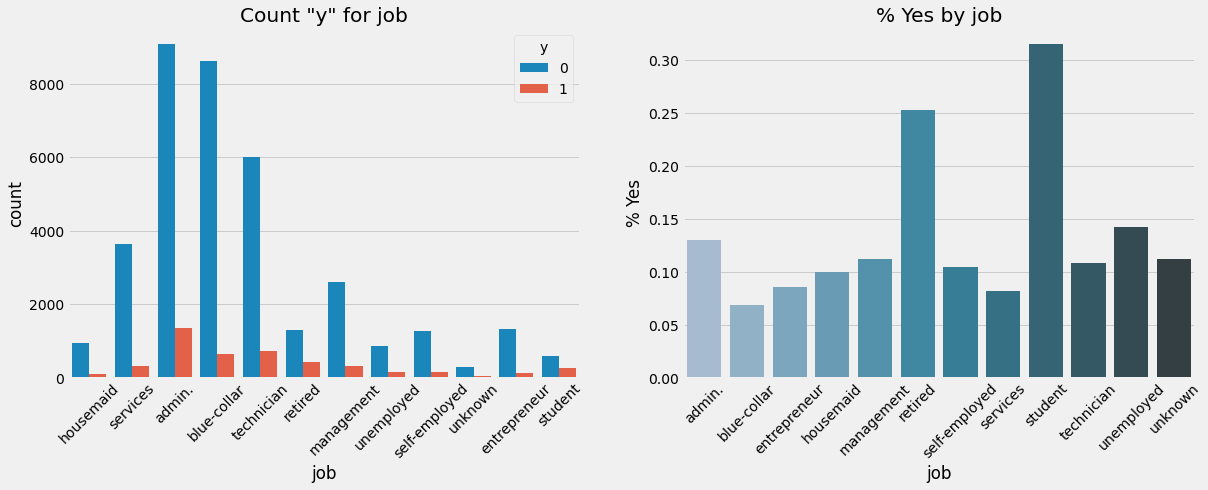

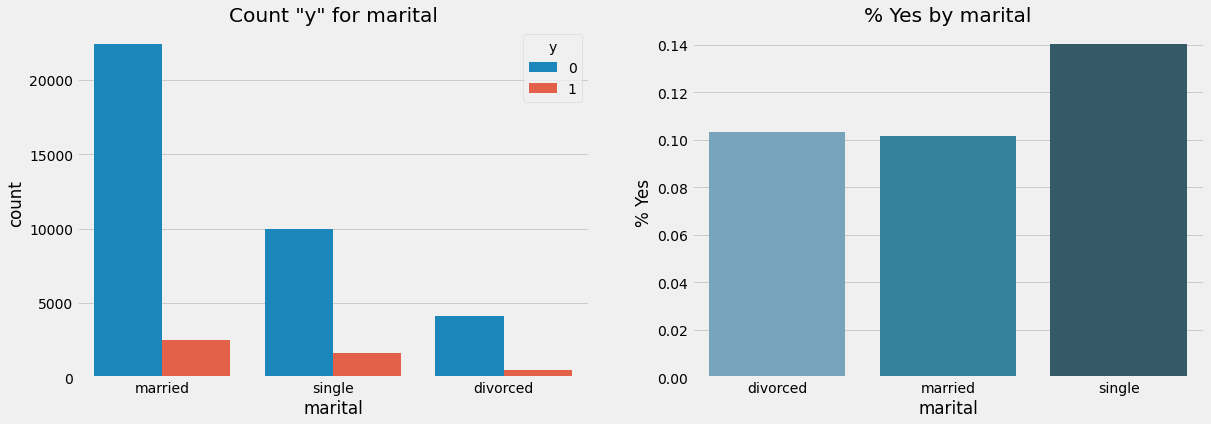

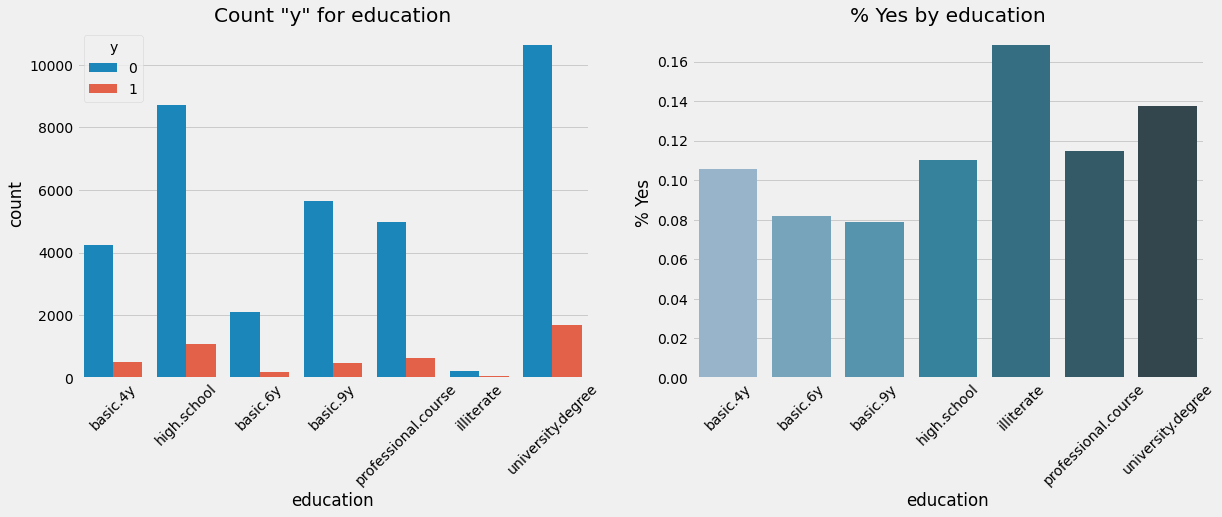

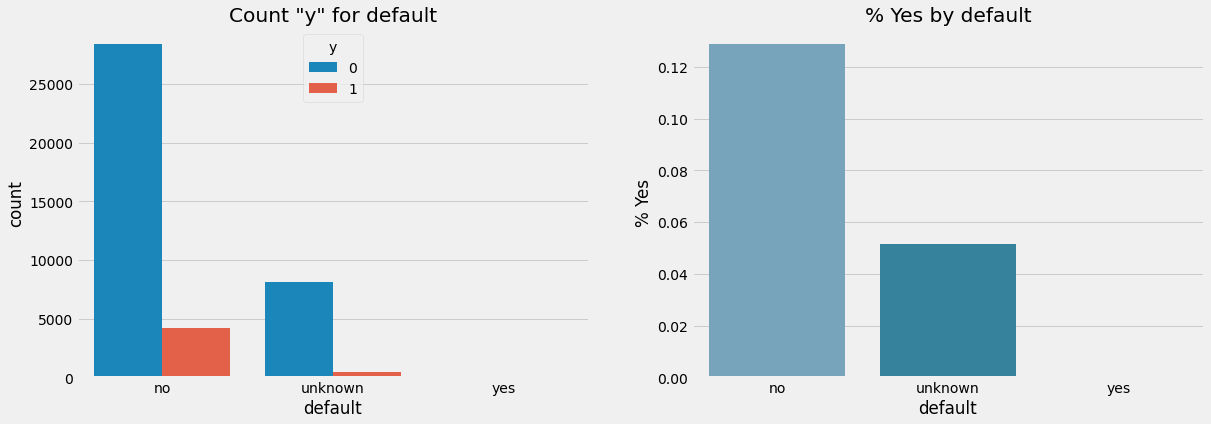

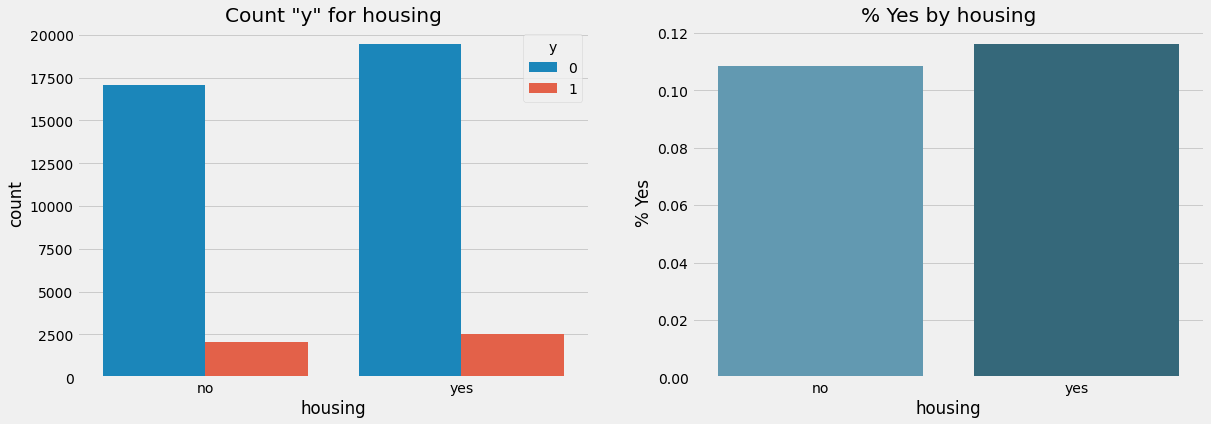

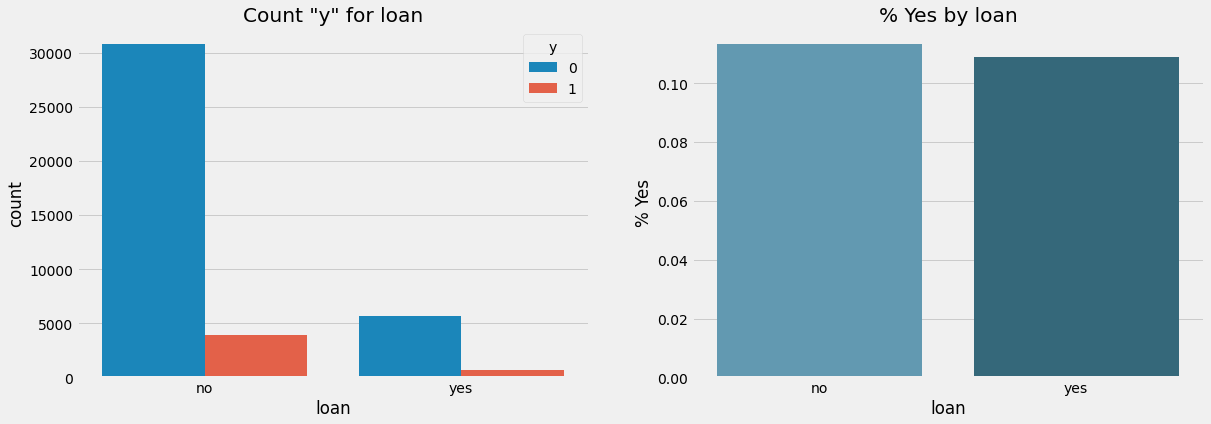

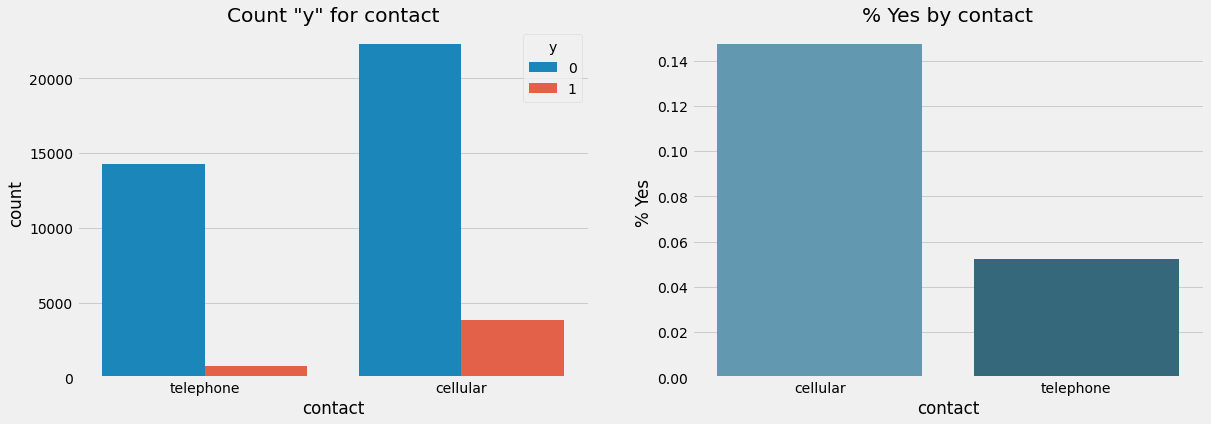

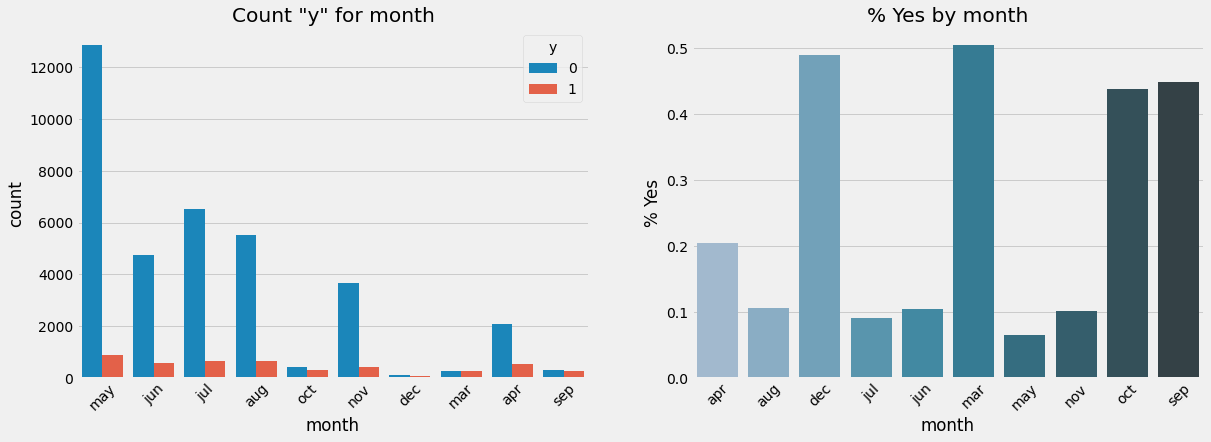

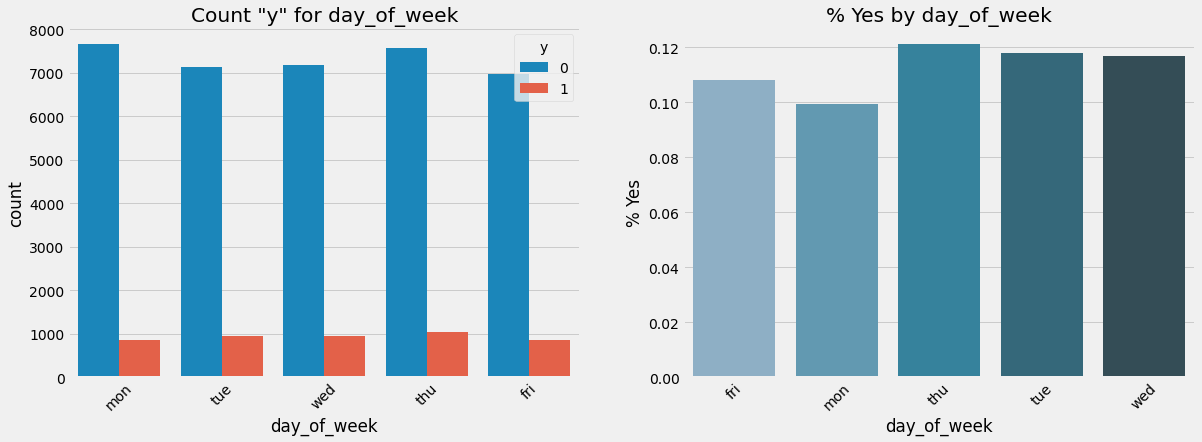

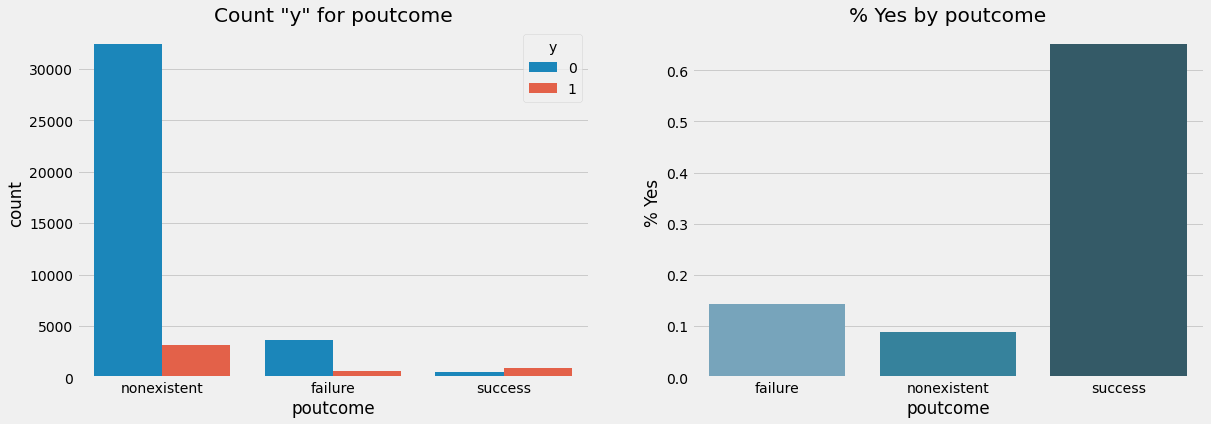

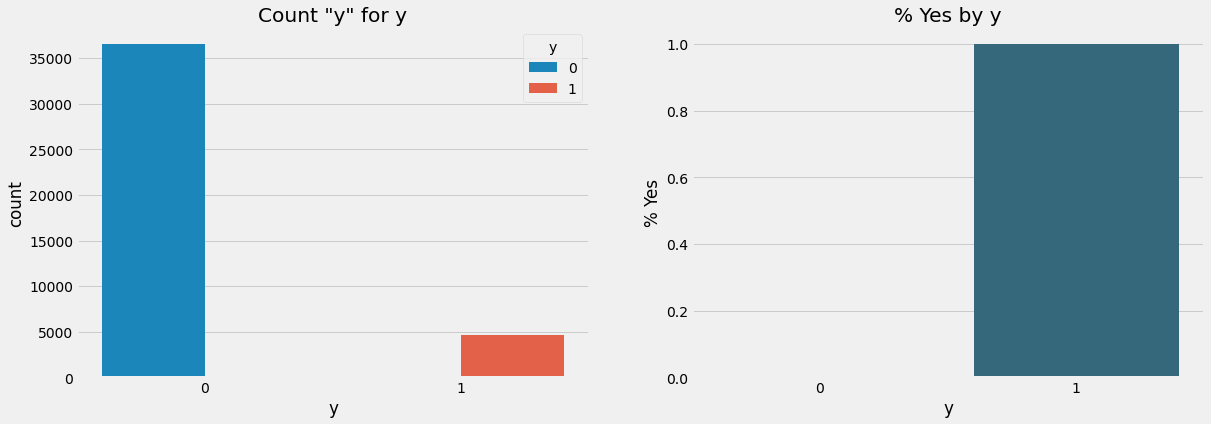

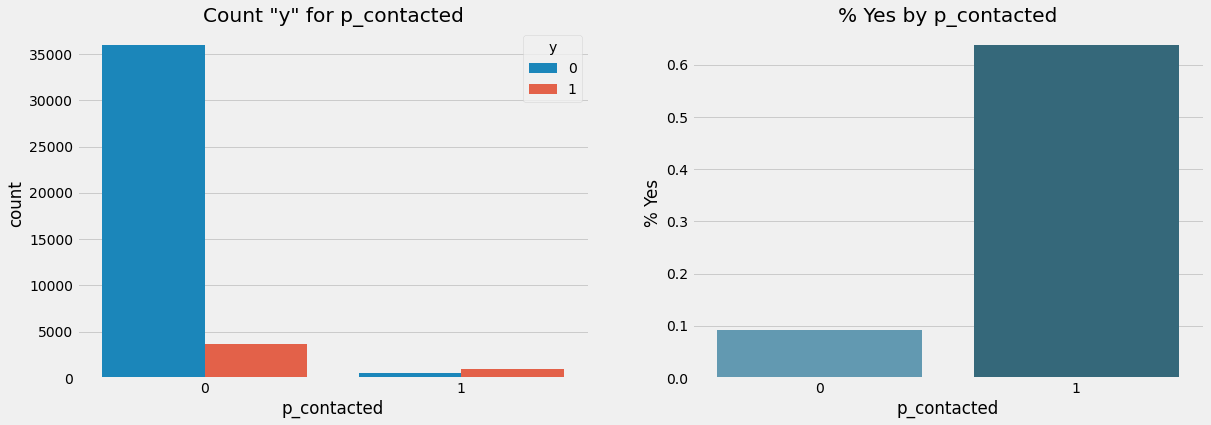

In [41]:
# iterate through the categorical variables and plot the value counts and 
# percentage 'y' for each value

for col in cat_data.columns.values:
    plt.figure(figsize=(18, 6))    
    
    plt.subplot(1,2,1)
    sns.countplot(x=cat_data[col], data=cat_data, hue='y')
    plt.title(f'Count "y" for {col}')
    if cat_data[col].nunique() > 3:
            plt.xticks(rotation=45)
    
    plt.subplot(1,2,2)
    cat_percent = cat_data.groupby(col)['y'].mean()
    sns.barplot(x=cat_percent.index, y=cat_percent.values, palette='PuBuGn_d')
    plt.ylabel('% Yes')
    plt.title(f'% Yes by {col}')
    if cat_data[col].nunique() > 3:
            plt.xticks(rotation=45)
    plt.show()

#### Categorical feature observations

* `Job`: Overall job does not appear to be much of a predictor of success for the marketing campaign. Although there does appear to be greater success among students, retirees and admin professionals, these groups represent relatively small numbers within the overall campaign. It could be a sign that this particular product was well suited to them.
* `Marital`: Success among married and divorced people appear roughly the same, but there is much more success among single people. That may turn out to be a good predictor. 
* `Education`: Success seems a little more evenly distributed here. It appears high among the illiterate, but they represent a very small number of the total count. University educated individuals appear to respond well, and they are the largest group in the data. This feature could be a good predictor.
* `Default`: Those that have not defaulted on a loan are much more likely to become customers than the unknowns, and at a slightly higher average ~12.5% than the overall average ~10%.
* `Housing`: Whether or not someone has a home loan does not appear to have much of a relationship with the success of the campaign.
* `Loan`: Personal loans also do not appear to be much of a predictor.
* `Contact`: Customers contacted via cellular phone appear to be much more likely to be successful prospects, this is quite interesting. Cellular customers were also contacted more, but not with so much imbalanced distribution.
* `Month`: Month does not appear to have a very significant effect. There are months with very high success rates, but those are often months that also have very low relative counts. It would be interesting to know if those are follow-ups in the later months, or return customers or warm leads in the early months. Overall it appears that the majority of the campaign occured between May and August
* `Day of week`: Day of week does not seem to have a large amount of significance, but the middle days do appear to be slightly more successful than Monday and Friday.
* `Poutcome`: The outcome of the previous marketing campaign does appear to have an effect. Even though it is a very small number, prior success seems to suggest later success. And, those that were contacted and failed also are more successful, indicating that returning to previous targets may have a positive impact.
* `Pcontacted`: Those that had been previously contacted in the campaign ended up signing up at a rate of 60%, that is very high, even though the overall count of these individuals is small. This variable is tough to interpret because intuitively it makes sense that customers that have been contacted before are more likely to have signed up than those called for the first time simply because they have been given more opportunities to say "yes". There are a number of reasons these people may have been called more than once that do not suggest a greater amount of calls necessarily results in greater customer conversion, but it also suggest that customers that are leaning yes may be more likely converted with persistence.

Variables to keep an eye on are: `Pcontacted`, `Job_student`, `Job_retired`, `Marital_single`, `Contact_cellular`

Variables that may not be as helpful: `Month`, `Day of week`, `Housing`, `Loan`

Perhaps one of the most important observations we can see from above is that our target variable, `y` is imbalanced. Only ~11% of the rows observed here result in a positive customer conversion. We will take that into account as we are doing our final feature transformations.

### Numerical Variables
Let's dig deeper into the numerical variables and see if we can gain more early insights.

Let's remember that we began with a different list of variables than we have now, so let's check and see what we need to update.

In [43]:
# check the values we have for continuous variables
numerical_features

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [54]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,p_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [58]:
#drop 'pdays' from the list 
numerical_features.remove('pdays')
numerical_features

['age',
 'duration',
 'campaign',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [62]:
# create a dataframe of numerical features using our numerical list
numerical_data = df[numerical_features]
numerical_data.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0


In [64]:
# create a function that iterates through the dataframe and plots histograms for the numerical features
def plot_numerical(df):
    
    fig = plt.figure(figsize=(15,30))
    plt.subplots_adjust(hspace=.25)

    nrows = len(df.columns) //2 +1 
    ncols = 2
    
    for i,t in enumerate(list(df.columns)):
        ax = fig.add_subplot(nrows, ncols, i+1)
        sns.distplot(a= df[t],   
                     ax=ax)
        plt.title(t + '_distribution')

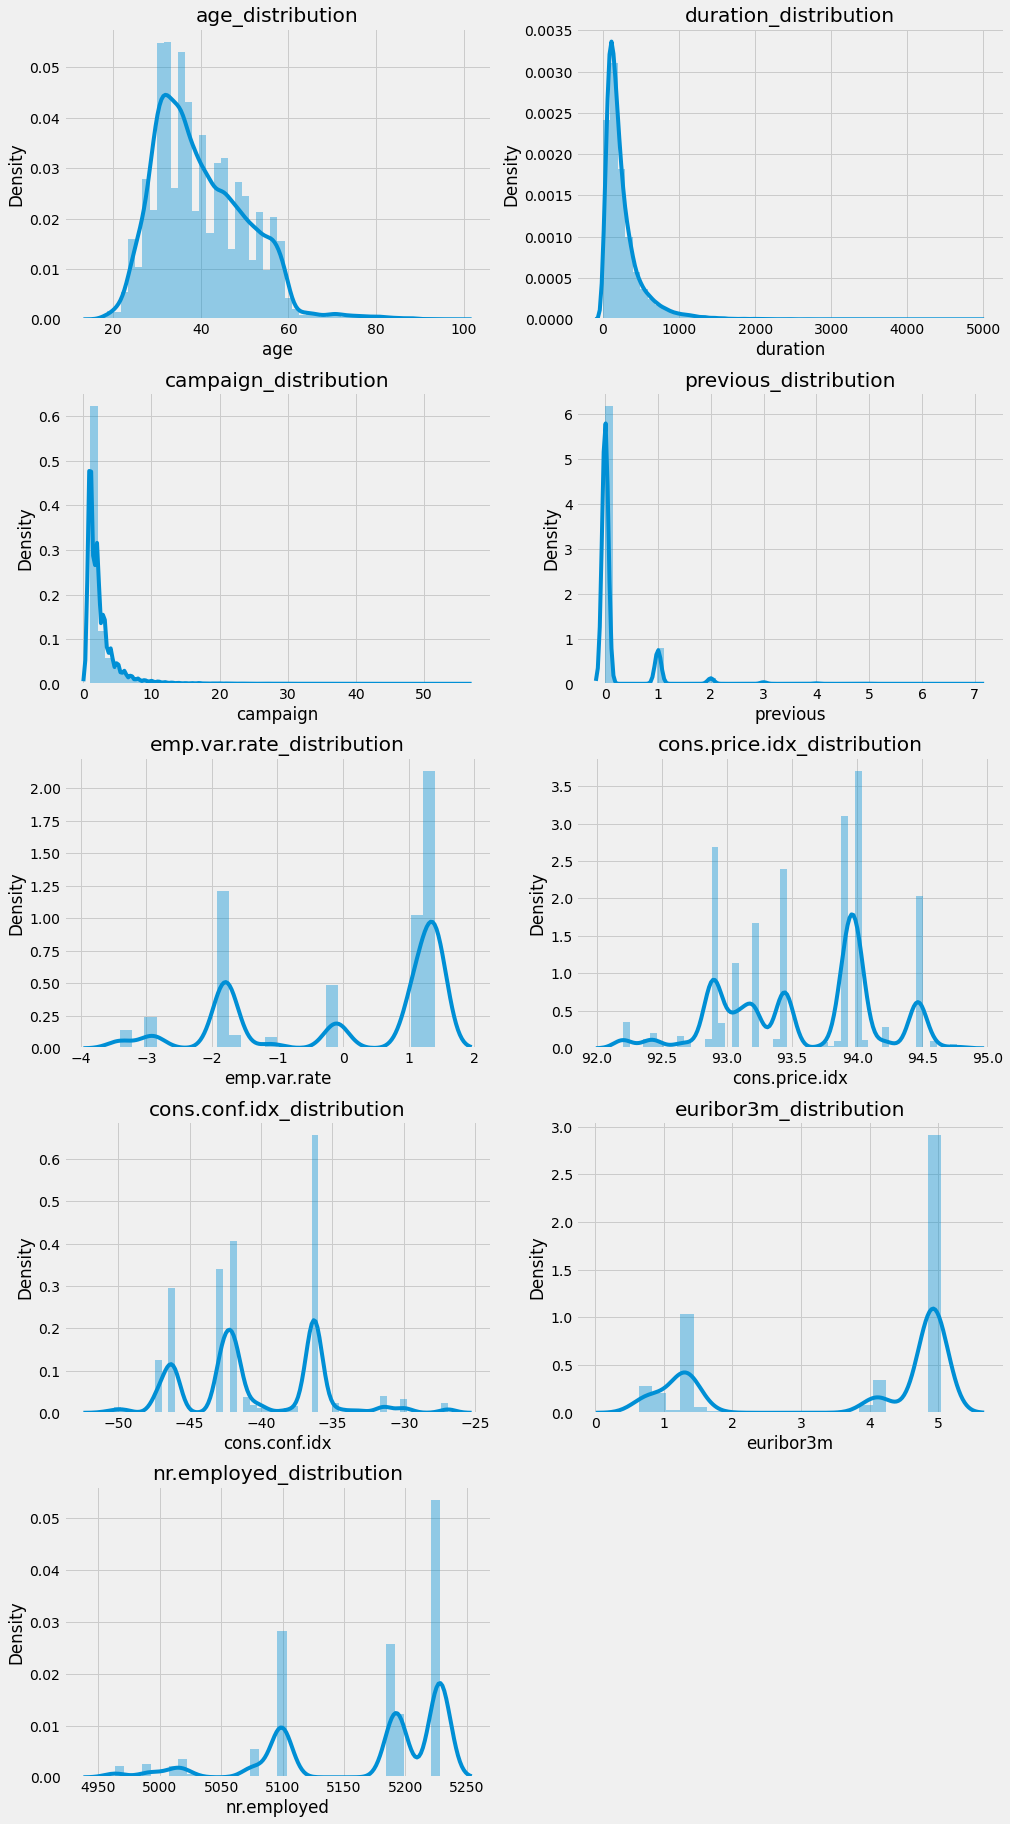

In [65]:
# plot histograms for the continuus variables
plot_numerical(numerical_data)

#### Numerical features distribution observations
* Most of the data are not normally distributed, with `Age` being the closest variable that is
* The variables that have to do with number of times contacted (campaign), or previously contacted (previous), are all very skewed to the right due to the fact that most people had not previously been contacted or were not contacted a large number of times
* Other variables like `cons.price.idx` and `con.conf.idx` have similar shapes and which suggests there might be some sort of correlation. Similar for `emp.var.rate`, `nr.employed` and the `euribor3m`.

We've seen one representation of outliers here, let's see how they look with a box plot

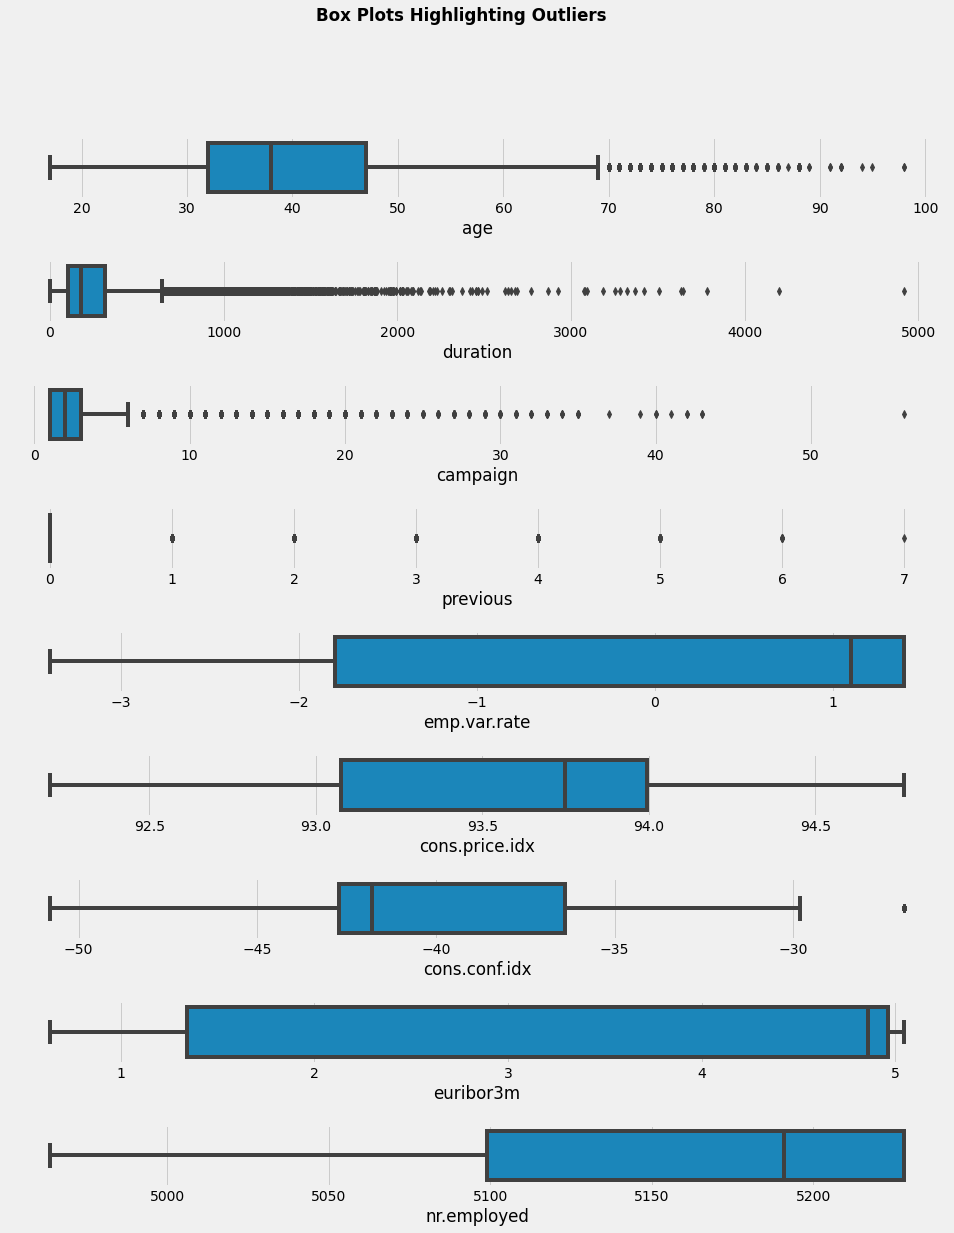

In [70]:
# create a box plot for each continuous variable
nrows = len(numerical_features)
fig, axes = plt.subplots(ncols=1, 
                         nrows=nrows, 
                         figsize=(15,nrows*2))
plt.subplots_adjust(hspace=1)

for i, var in enumerate(numerical_features):
    sns.boxplot(numerical_data[var], orient='h', ax=axes[i])

fig.suptitle('Box Plots Highlighting Outliers', fontweight='bold')
plt.show()

#### Observations for numuerical data:
* Similar to observations above, outliers for age begin around 70
* `Campaign` and `previous` are tightly clustered around 0 and lower numbers, almost to the point of binning them our creating a categorical similar to what we did with p_contacted
* Our economic variables all seem to have few outliers, which is not surprising given that many of them are indexes and likely designed to stay within a certain range. These may be more reliable predictors